In [1]:
import numpy as np
import pandas as pd

test_file = "/Users/richardbieringa/Projects/mesh-bench/results/01_http_max_throughput/http_baseline_MAX_0_1_2022-06-20T08:32:57Z.json"

In [2]:
s = pd.read_json(test_file, typ="series")

# Filter columns
required_cols = [
    "StartTime",
    "RequestedQPS",
    "RequestedDuration",
    "ActualQPS",
    "ActualDuration",
    "DurationHistogram",
]

s = s[required_cols]

# Extract nested columns in 'DurationHistogram'
for key, val in s["DurationHistogram"].items():
    s[key] = val
s = s.drop(["DurationHistogram", "Percentiles"])


s


StartTime                               2022-06-20T08:32:59.487539804Z
RequestedQPS                                                       max
RequestedDuration                                                15m0s
ActualQPS                                                    8746.6817
ActualDuration                                            900002111624
Count                                                          7872032
Min                                                           0.000047
Max                                                            0.16879
Sum                                                       28795.839311
Avg                                                           0.003658
StdDev                                                        0.003416
Data                 [{'Start': 4.7225e-05, 'End': 0.0001, 'Percent...
dtype: object

In [3]:
# fortio reports in seconds, convert to miliseconds
multiplier = 1000

s.loc[["Min", "Max", "Sum", "Avg"]] *= multiplier

# Construct Histogram Bins, Counts and Percentiles

data = s["Data"]


s["counts"] = [x["Count"] for x in data]
s["percentages"] = [x["Percent"] for x in data]

# Bins (default pd.cut function makes them as categoricals of intervals)
# https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html
# https://pandas.pydata.org/docs/reference/api/pandas.Interval.html
s["categories"]= pd.Categorical([pd.Interval(x["Start"] * multiplier , x["End"] * multiplier) for x in data])
s["bins"] = [x.left for x in s["categories"]]
s["bins"].append(s["categories"][-1].right)

s = s.drop("Data")
s

StartTime                               2022-06-20T08:32:59.487539804Z
RequestedQPS                                                       max
RequestedDuration                                                15m0s
ActualQPS                                                    8746.6817
ActualDuration                                            900002111624
Count                                                          7872032
Min                                                           0.047225
Max                                                          168.79017
Sum                                                    28795839.311071
Avg                                                           3.657993
StdDev                                                        0.003416
counts               [25198, 92183, 97250, 100720, 104478, 110855, ...
percentages          [0.32009524351527, 1.491114365388758, 2.726500...
categories           [(0.047225, 0.1], (0.1, 0.2], (0.2, 0.30000000...
bins  

In [4]:
# bins = s["bins"]

# dir(bins[0])
# bins[0].left
# # bins[0].right

# b = [x.left for x in bins]
# b.append(bins[-1].right)
# b


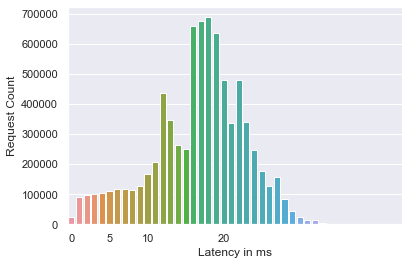

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme(style="darkgrid")


fig, ax = plt.subplots()
sns.barplot(data=s, x=s["bins"][:-1], y="counts")


# ax.set_xticks(range(1, 11))
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())

ax.set_ylabel("Request Count")
ax.set_xlabel("Latency in ms")

ax.set_xticks([0, 5, 10, 20])


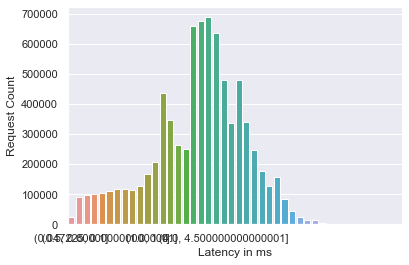

In [6]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots()
sns.barplot(data=s, x="categories", y="counts")


# ax.set_xticks(range(1, 11))

ax.set_ylabel("Request Count")
ax.set_xlabel("Latency in ms")
ax.set_xticks([0, 5, 10, 20])



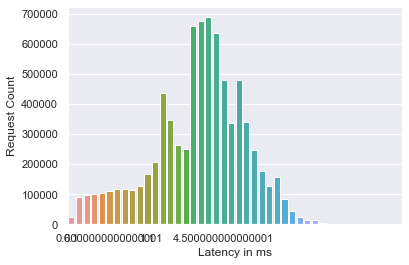

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots()
sns.barplot(x=s["bins"][1:], y=s["counts"])



# ax.set_xticks(range(1, 11))

ax.set_ylabel("Request Count")
ax.set_xlabel("Latency in ms")
ax.set_xticks([0, 5, 10, 20])



In [21]:
from plotnine import *
from plotnine.data import *

%matplotlib inline

s
s['counts']


[25198,
 92183,
 97250,
 100720,
 104478,
 110855,
 118684,
 115629,
 114544,
 126845,
 167858,
 207794,
 435489,
 346508,
 263419,
 251682,
 657889,
 676682,
 688165,
 635349,
 480361,
 336816,
 478451,
 341354,
 246735,
 177411,
 128179,
 155701,
 84428,
 44848,
 24082,
 12787,
 13108,
 4489,
 1905,
 984,
 518,
 458,
 484,
 389,
 298,
 213,
 172,
 640]

In [22]:
(
    ggplot(s, aes(x=s["bins"][1:], y='counts'))
        + geom_col(stat='identity', position='dodge')
) 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
import altair as alt

alt.Chart(s).mark_bar().encode(
    x="bins",
    y="counts"
)